In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Display the first few rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Data Preprocessing / Exploratory Data Analysis (EDA)

In [3]:
print("Dataset Shape:", df.shape) # Rows and Columns
print("Dataset Columns:", df.columns) # Column Names

Dataset Shape: (5000, 14)
Dataset Columns: Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [4]:
# Check for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# # Encode Categorical Variables (Column_1, column_2, column_3,,)
# le = LabelEncoder()

# df['Column_1'] = le.fit_transform(df['Column_1'])
# df['column_2'] = le.fit_transform(df['column_2'])
# .....

# It's not usable for this dataset. Because they all are numarice value. But I wrote syntax for usable dataset(Which has string value)

In [5]:
# Drop unnecessary columns (e.g., ID, ZIP Code)
df = df.drop(['ID', 'ZIP Code'], axis=1)

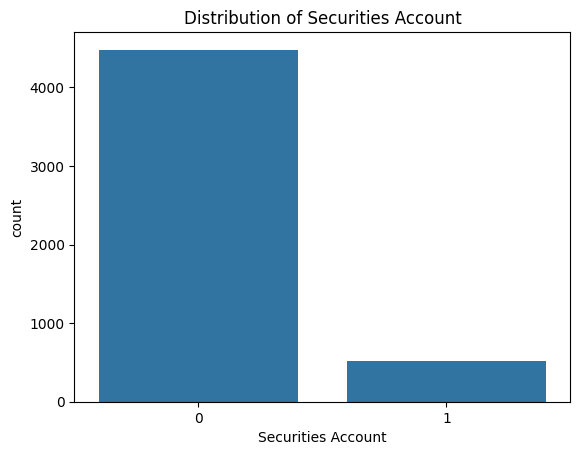

In [6]:
# Step 6: Visualize the Data
# Distribution of Securities Account
sns.countplot(x='Securities Account', data=df)
plt.title('Distribution of Securities Account')
plt.show()

In [7]:
# Count Securities Account values 0
print((df['Securities Account'] == 0).sum())

4478


# Implement Naive Bayes

In [8]:
# Separate features and target variable
X = df.drop('Securities Account', axis=1) # Features
y = df['Securities Account'] # Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Train the Naive Bayes Model

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
# Make Predictions and Evaluate the Model

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix:
 [[1292   48]
 [ 117   43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1340
           1       0.47      0.27      0.34       160

    accuracy                           0.89      1500
   macro avg       0.69      0.62      0.64      1500
weighted avg       0.87      0.89      0.88      1500



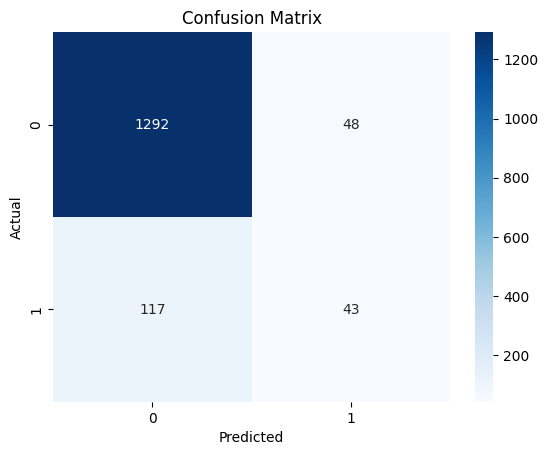

In [ ]:
# Visualizing Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()